# Kaggle - TripAdvisor
## 1 - Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Files

In [2]:
#path = r"C:\Users\Romain\Documents\230 - MSc ESSEC\301 - Big Data Analytics\01 - Kaggle\Datasets"
data = pd.read_csv('tripadvisor_co_uk-travel_restaurant_reviews_sample.csv')
#df = pd.read_csv(path+r'\tripadvisor_co_uk-travel_restaurant_reviews_sample.csv')
#df = pd.read_csv('tripadvisor_co_uk-travel_restaurant_reviews_sample.csv')

In [3]:
# delete rows without review_text
data.loc[11681,'review_text']=np.nan
data.loc[18379,'review_text']=np.nan
data=data[data.review_text.isnull()==False]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17795 entries, 0 to 19997
Data columns (total 17 columns):
uniq_id                17795 non-null object
url                    17795 non-null object
restaurant_id          17795 non-null object
restaurant_location    17795 non-null object
name                   17795 non-null object
category               17795 non-null object
title                  17795 non-null object
review_date            17704 non-null object
review_text            17795 non-null object
author                 17728 non-null object
author_url             17465 non-null object
location               14494 non-null object
rating                 17223 non-null object
food                   8840 non-null object
value                  9023 non-null object
service                9131 non-null object
visited_on             16667 non-null object
dtypes: object(17)
memory usage: 2.4+ MB


## 3 - Data Cleaning
### Transform rating columns into categories columns

In [4]:
def col_rating(col='rating'):
    data[col]=data[col].fillna(str(-1))
    data[col]=data[col].astype('category')
    
    dico_rating=dict()
    dico_rating['-1']=0
    dico_rating['April 2015']=0
    dico_rating['September 2015']=0
    for i in range(5):
        dico_rating[str(i+1)+' of 5 bubbles']=i+1
        dico_rating[str(i+1)+'.0 of 5 bubbles']=i+1
        dico_rating[str(i+1)+' of 5 stars']=i+1
        
    data[col]=data[col].map(dico_rating).astype('category')

In [5]:
col_rating('rating')
col_rating('food')
col_rating('value')
col_rating('service')

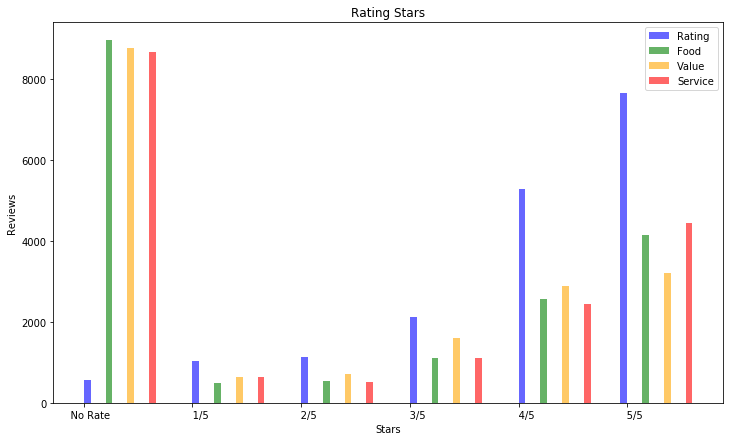

In [6]:
b=80
s=0.2
a=0.6

group_labels = ['    No Rate','     1/5','     2/5','     3/5','     4/5','     5/5']
x1=[0,1,2,3,4,5]

fig, ax1 = plt.subplots(figsize=(12,7))

plt.hist(data.rating, bins=b, alpha=a, label='Rating', align='mid', color='b')
plt.hist(data.food+s, bins=b, alpha=a, label='Food', align='mid', color='green')
plt.hist(data.value+s*2, bins=b, alpha=a, label='Value', align='mid', color='orange')
plt.hist(data.service+s*3, bins=b, alpha=a, label='Service', align='mid', color='r')

plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.title('Rating Stars')
plt.legend(loc='upper right')

ax1.set_xticks(x1)
ax1.set_xticklabels(group_labels, minor=False, rotation=0)

plt.show()

### Transform format of review_date into to_datetime(%Y-%m-%d) et fillna(2006-01-01)

In [7]:
#data.loc[11681,'review_date']
#data.loc[18379,'review_date']
data.review_date=data.review_date.fillna('2006-01-01')

for i in data.loc[data['review_date'].str[1]==' ', 'review_date'].index:
    data.loc[i, 'review_date']='0'+str(data.loc[i, 'review_date'])
for i in data.loc[data['review_date'].str[2]==' ', 'review_date'].index:
    data.loc[i, 'review_date']=str(data.loc[i,'review_date'][-4:])+'-'+str(data.loc[i,'review_date'][3:6])+'-'+str(data.loc[i,'review_date'][0:2])

dico_month={"Jan":'01',"Feb":'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
for key, value in dico_month.items():
    for i in data.loc[data['review_date'].str[5:8]==str(key), 'review_date'].index:
         data.loc[i,'review_date']=str(data.loc[i,'review_date'][:5])+str(value)+str(data.loc[i,'review_date'][8:])

data.review_date=pd.to_datetime(data.review_date, format ='%Y-%m-%d')

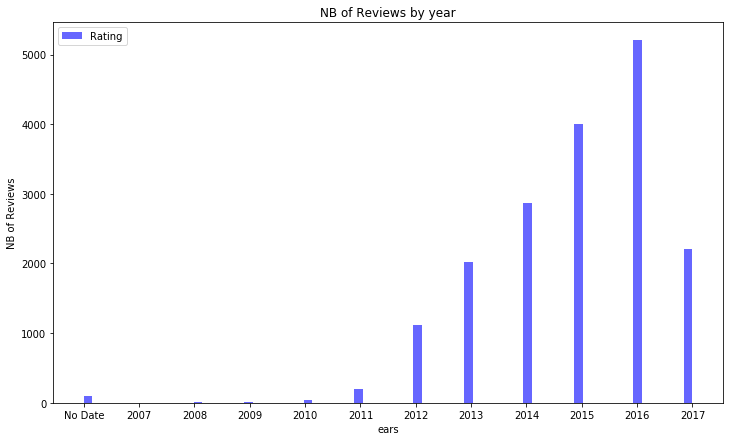

In [8]:
b=48
s=0.2
a=0.6

group_labels = ['No Date','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
x1=range(2006,2018)

fig, ax1 = plt.subplots(figsize=(12,7))

plt.hist(data['review_date'].apply(lambda x : str(x)[:4]).astype(int), bins='auto', alpha=a, label='Rating', align='mid', color='b')

plt.xlabel('ears')
plt.ylabel('NB of Reviews')
plt.title('NB of Reviews by year')
plt.legend(loc='upper left')

ax1.set_xticks(x1)
ax1.set_xticklabels(group_labels, minor=False, rotation=0)

plt.show()

### Average number of words per review

In [9]:
data['nb_words']=data['review_text'].apply(lambda x : len(str(x).split()))
nb_words_per_star=[0,0,0,0,0,0]
for i in range(6):
    #print(str(int(data.loc[data['rating']==i, 'nb_lettre'].mean()))+' lettres en moyenne pour '+str(i)+' stars')
    nb_words_per_star[i]=int(data.loc[data['rating']==i, 'nb_words'].mean())

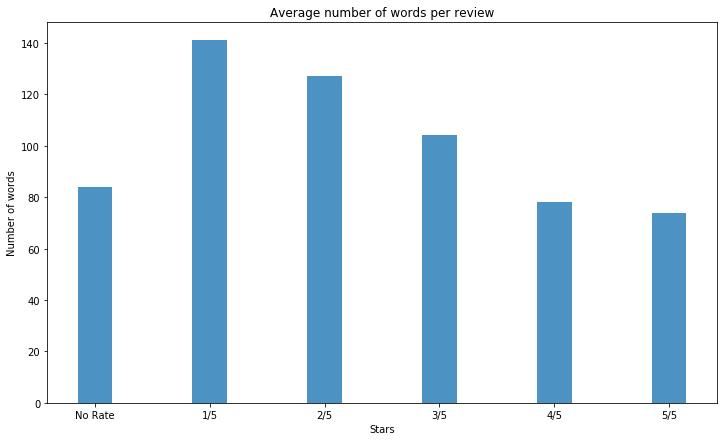

In [10]:
group_labels = ['No Rate','1/5','2/5','3/5','4/5','5/5']
x1=[0,1,2,3,4,5]

fig, ax1 = plt.subplots(figsize=(12,7))


plt.bar(x1,nb_words_per_star, width=0.3, alpha=0.8)
plt.xlabel('Stars')
plt.ylabel('Number of words')
plt.title('Average number of words per review')

ax1.set_xticks(x1)
ax1.set_xticklabels(group_labels, minor=False, rotation=0)

plt.show()

## 4 - Quentin
### Define dummies columns about global sentiment of the rating

In [11]:
#define dummies columns about the global sentiment of the rating
data['Neg'] = (data['rating'].astype(int)<4)&(data['rating'].astype(int)>0)
data['Pos'] = data['rating'].astype(int)>3

In [12]:
#number of positive, negative and neutral reviews
nb_pos = len(data[data['Pos']==True])
nb_neg = len(data[data['Neg']==True])
#nb_neu = len(data[data['Neu']==True])

print(str(nb_neg)+' ; '+str(nb_pos))

4293 ; 12930


### Stop words and cleaning reviews

In [13]:
stopwords_file = open('stopwords.csv', 'r') 
stopwords = []
for word in stopwords_file:
    stopwords.append(word.strip('\n'))

In [17]:
#print(stopwords)

In [14]:
import re
def clean_review(review):
    rx = re.compile('\W+')
    review = str(review).lower().split()
    review = [rx.sub(' ',i).strip() for i in review if i not in stopwords and rx.sub(' ',i).strip()!= '']
    return review

In [15]:
data['review'] = data['review_text'].apply(lambda x : clean_review(x))

In [20]:
#data['review']

In [16]:
df_final = data[['review', 'Pos', 'Neg']]

### Count words per label without stopwords

In [17]:
range_interest=10
def graph_frequency_words(range_interest, dic, title='Most usefull words'):
    neu_word_array=[]
    for i in range(range_interest):
        neu_word_array.append(dic[i][0])
    neu_count_array=[]
    for i in range(range_interest):
        neu_count_array.append(dic[i][1])
    
    group_labels = neu_word_array
    x1=np.array(range(range_interest))

    fig, ax1 = plt.subplots(figsize=(12,7))


    plt.bar(x1,neu_count_array, width=0.3, alpha=0.8)
    plt.xlabel('Words')
    plt.ylabel('Number of words')
    plt.title(title)

    ax1.set_xticks(x1)
    ax1.set_xticklabels(group_labels, minor=False, rotation=45)

    return plt.show()

In [18]:
#count words for pos label
pos_dic = {}
for i in df_final[df_final['Pos'] == True].index:
    for j in range(len(df_final['review'][i])):
        if df_final['review'][i][j] not in pos_dic:
            pos_dic[str(df_final['review'][i][j])] = 1
        else:
            pos_dic[str(df_final['review'][i][j])] += 1

pos_dic = sorted(pos_dic.items(), key=lambda x: x[1], reverse=True)
print(pos_dic)

[('food', 9424), ('good', 7860), ('great', 5884), ('service', 5309), ('not', 4896), ('restaurant', 4450), ('staff', 4181), ('place', 3642), ('friendly', 3102), ('really', 3095), ('london', 2863), ('nice', 2731), ('us', 2656), ('excellent', 2654), ('menu', 2635), ('one', 2456), ('well', 2439), ('time', 2438), ('will', 2301), ('just', 2287), ('lovely', 2276), ('go', 2270), ('meal', 2207), ('back', 2187), ('delicious', 2118), ('atmosphere', 1984), ('lunch', 1851), ('recommend', 1817), ('best', 1777), ('also', 1749), ('table', 1746), ('like', 1733), ('wine', 1698), ('visit', 1691), ('definitely', 1669), ('went', 1659), ('can', 1657), ('always', 1598), ('tasty', 1466), ('little', 1454), ('get', 1399), ('bar', 1324), ('evening', 1321), ('fresh', 1320), ('amazing', 1310), ('made', 1301), ('quality', 1277), ('experience', 1249), ('bit', 1235), ('no', 1225), ('dinner', 1221), ('busy', 1206), ('value', 1190), ('it', 1190), ('dishes', 1160), ('night', 1160), ('cooked', 1143), ('fish', 1133), ('ea

In [19]:
#count words for neg label
neg_dic = {}
for i in df_final[df_final['Neg'] == True].index:
    for j in range(len(df_final['review'][i])):
        if df_final['review'][i][j] not in neg_dic:
            neg_dic[str(df_final['review'][i][j])] = 1
        else:
            neg_dic[str(df_final['review'][i][j])] += 1

neg_dic = sorted(neg_dic.items(), key=lambda x: x[1], reverse=True)

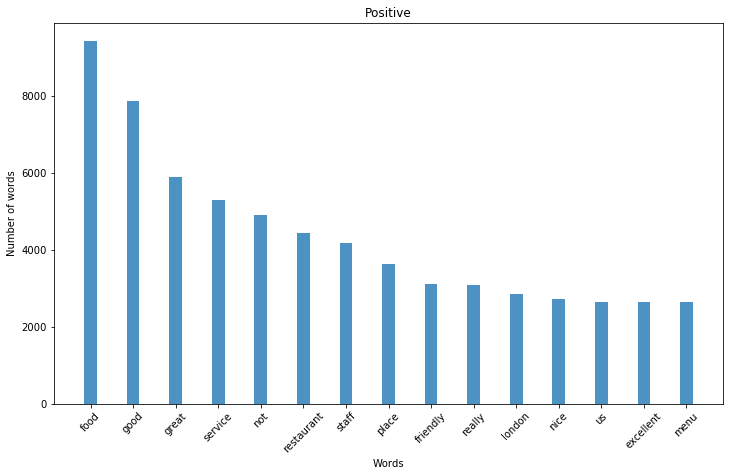

In [30]:
graph_frequency_words(range_interest=15, dic=pos_dic, title='Positive')

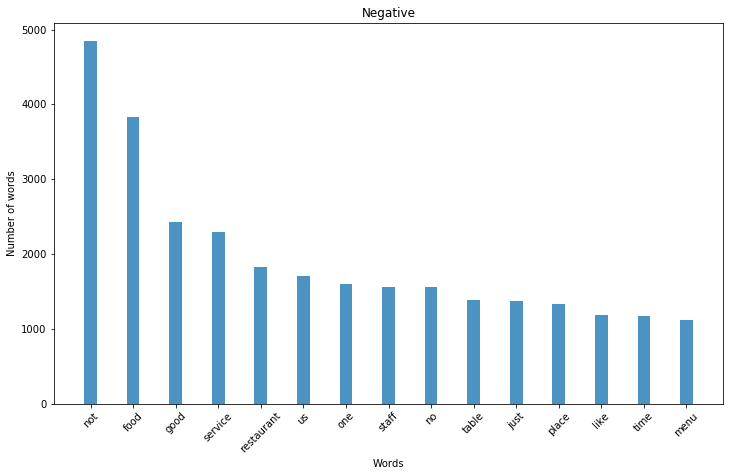

In [29]:
graph_frequency_words(range_interest=15, dic=neg_dic, title='Negative')

# PROBA

In [20]:
#calcule des proba des classes (Pos/Neg)
prob_pos = len(df_final[df_final['Pos']==True])/len(df_final)
print(prob_pos)
prob_neg = len(df_final[df_final['Neg']==True])/len(df_final)
print(prob_neg)

0.7266085979207643
0.24124754144422592


In [21]:
df_final['review'][0][0]

'fantastic'

In [40]:
k = 13
for i in range(len(df_final['review'][k])):
    print(df_final['review'][k][i], prob_pos*(sum(df_final['review'][df_final['Pos'] == True].apply(lambda x : df_final['review'][k][i] in x))+1)/len(df_final[df_final['Pos']==True]),
    prob_neg*(sum(df_final['review'][df_final['Neg'] == True].apply(lambda x : df_final['review'][k][i] in x))+1)/len(df_final[df_final['Neg']==True]))

went 0.0850238831132 0.0451812306828
covent 0.0224220286597 0.00831694296151
garden 0.0275358246699 0.00938465861197
branch 0.00708064062939 0.00522618713122
top 0.0280977802754 0.0110705254285
floor 0.00893509412756 0.00275358246699
just 0.108626018545 0.0585557740938
started 0.0107333520652 0.00584433829727
eat 0.0583871874122 0.0280977802754
saw 0.00758640067435 0.00573194717617
mouse 0.000730542287159 0.000505760044956
just 0.108626018545 0.0585557740938
walking 0.00876650744591 0.00427086260185
next 0.0401236302332 0.0159033436359
us 0.109356560832 0.056532733914
mouse 0.000730542287159 0.000505760044956
running 0.00264119134588 0.00309075583029
around 0.0420342792919 0.0211857263276
tables 0.0296712559708 0.0191064905872
wanted 0.0198370328744 0.0170272548469
leave 0.00927226749087 0.00966563641472
immediately 0.00708064062939 0.00247260466423
instead 0.00635009834223 0.00927226749087
saying 0.00309075583029 0.00438325372296
apology 0.000561955605507 0.00590053385783
brought 0.01

In [42]:
for k in range(50):
    predict_pos = 1
    predict_neg = 1
    for i in range(len(df_final['review'][k])):
        predict_pos *= (sum(df_final['review'][df_final['Pos'] == True].apply(lambda x : df_final['review'][k][i] in x))+1)/len(df_final[df_final['Pos']==True])
        predict_neg *= (sum(df_final['review'][df_final['Neg'] == True].apply(lambda x : df_final['review'][k][i] in x))+1)/len(df_final[df_final['Neg']==True])
    df_final.loc[k, 'predict']= predict_pos*prob_pos > predict_neg*prob_neg
    print(predict_pos*prob_pos > predict_neg*prob_neg)

C:\Users\qbblo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


False
False
True
False
True
False
False
False
True
True
True
False
False
False
False
True
False
False
True
False
False
False
False
False
True
False
False
False
False
True
True
False
False
True
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False


In [44]:
df_final['comp'] = df_final['Pos'] == df_final['predict']

C:\Users\qbblo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
len(df_final[df_final['comp']==True])

34

In [24]:
df_final['review'][0]

['fantastic',
 'usual',
 'friendly',
 'service',
 'always',
 'head',
 'nursing',
 'usual',
 'high',
 'cost',
 'city',
 'hangover',
 'don t',
 'worry',
 'ballans',
 'will',
 'never',
 'feel',
 'ripped',
 'off',
 'types',
 'eggs',
 'choose',
 'cooked',
 'perfection',
 'lovely',
 'sausage',
 'toast',
 'beans',
 'small',
 'pieces',
 'hash',
 'browns',
 'take',
 'beer',
 'side',
 'enjoy',
 'trip',
 'balans',
 'don t',
 'even',
 'look',
 'another',
 'way',
 'westfield',
 'place',
 'go',
 'come']

In [54]:
df_final = df_final[df_final['Pos'] == True]
df_final_neg = df_final[df_final['Neg'] == True]

In [76]:
df_final[df_final['Neg']== True]

,review,Pos,Neg
1,"[average, pub, can, serve, quickly, side, will...",False,True
6,"[leaving, party, friend, shoved, corner, hardl...",False,True
7,"[cramped, somehow, joyless, interior, provides...",False,True
11,"[ended, bss, breakfast, menu, offering, enough...",False,True
12,"[went, dinner, partner, recommended, go, there...",False,True
13,"[went, covent, garden, branch, top, floor, jus...",False,True
15,"[couple, times, mostly, breakfast, amazing, pa...",False,True
16,"[nice, friendly, athmosphere, helpful, staff t...",False,True
19,"[prices, charge, like, bowl, lukewarm, not, ta...",False,True
21,"[stopped, gbk, frie, ds, decent, service, good...",False,True


In [103]:
from tqdm import tqdm as progbar